In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [64]:
data= pd.read_csv("C:/users/daniel/documents/edureka/CROSS VALIDATION TECHNIQUES/Types-of-Crossvalidation-master/Churn_Modelling.csv")

In [65]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [67]:
data.shape

(10000, 14)

In [68]:
data=data.drop(columns=["RowNumber","CustomerId","Surname"])

In [69]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Numerical Features

In [70]:
num_feat=[i for i in data.columns if data[i].dtypes !="O"]

data[num_feat].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


## Continous features

In [71]:
cont_feat=[i for i in num_feat if len(data[i].unique())>25]

data[cont_feat].head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


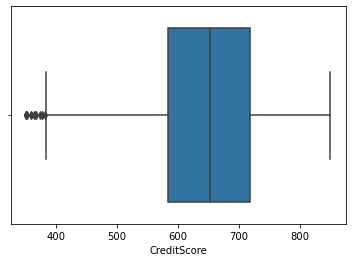

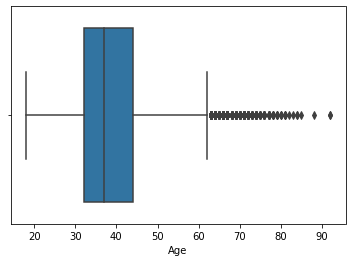

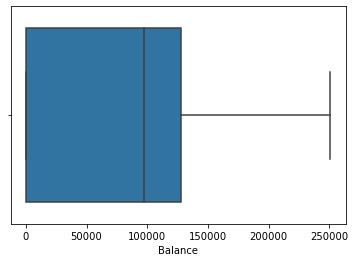

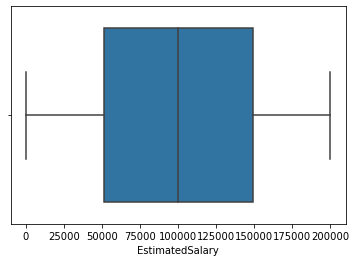

In [72]:
for i in cont_feat:
    
    sb.boxplot(x=data[i])
    plt.show()

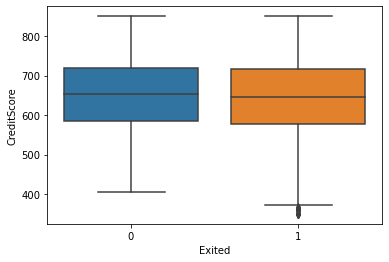

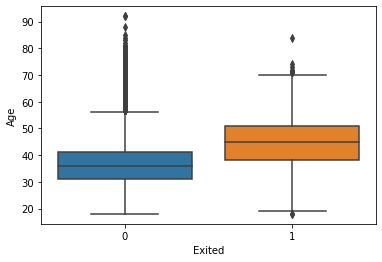

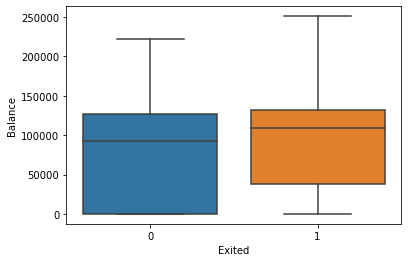

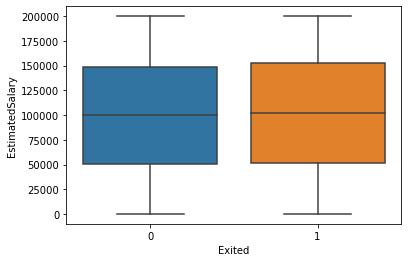

In [73]:
for i in cont_feat:
    
    sb.boxplot(x=data["Exited"],y=data[i])
    plt.show()

## Discrete Features

In [74]:
disc_feat=[i for i in num_feat if i not in cont_feat]

data[disc_feat].head()

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,2,1,1,1,1
1,1,1,0,1,0
2,8,3,1,0,1
3,1,2,0,0,0
4,2,1,1,1,0


In [75]:
count=[(i,len(data[i].unique()), data[i].value_counts()) for i in disc_feat]
count

[('Tenure',
  11,
  2     1048
  1     1035
  7     1028
  8     1025
  5     1012
  3     1009
  4      989
  9      984
  6      967
  10     490
  0      413
  Name: Tenure, dtype: int64),
 ('NumOfProducts',
  4,
  1    5084
  2    4590
  3     266
  4      60
  Name: NumOfProducts, dtype: int64),
 ('HasCrCard',
  2,
  1    7055
  0    2945
  Name: HasCrCard, dtype: int64),
 ('IsActiveMember',
  2,
  1    5151
  0    4849
  Name: IsActiveMember, dtype: int64),
 ('Exited',
  2,
  0    7963
  1    2037
  Name: Exited, dtype: int64)]

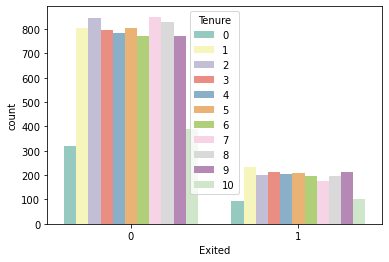

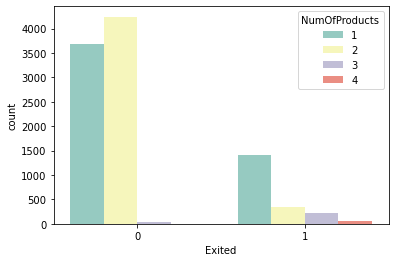

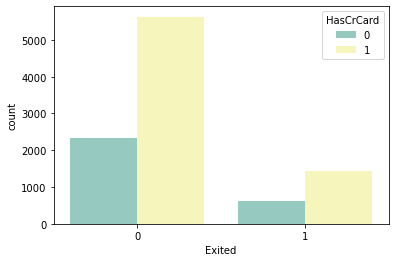

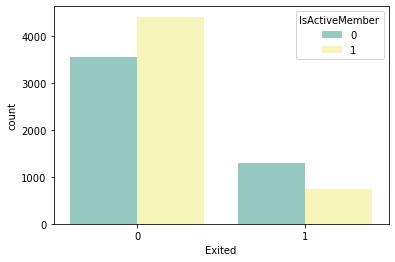

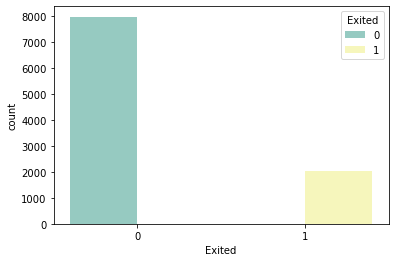

In [76]:
for i in disc_feat:
    sb.countplot(x=data["Exited"], hue=data[i],palette="Set3")
    
    plt.show()

# Categorical Features

In [77]:
cat_feat=[i for i in data.columns if i not in num_feat]

data[cat_feat].head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [78]:
c=[(i,len(data[i].unique()),data[i].value_counts()) for i in cat_feat ]
c

[('Geography',
  3,
  France     5014
  Germany    2509
  Spain      2477
  Name: Geography, dtype: int64),
 ('Gender',
  2,
  Male      5457
  Female    4543
  Name: Gender, dtype: int64)]

In [79]:
data=pd.get_dummies(data, columns=cat_feat)

In [80]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [81]:
x=data.drop(columns="Exited")

y=data["Exited"]

In [86]:
from sklearn.model_selection import train_test_split as tts

In [87]:
trainx,testx,trainy,testy=tts(x,y,test_size=0.25,random_state=3)

In [88]:
import xgboost

In [89]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,cross_val_score

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [91]:
xc=xgboost.XGBClassifier()

In [92]:
xc.fit(trainx,trainy)

C:\Users\Daniel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
ypred=xc.predict(testx)

print(accuracy_score(testy,ypred))
print(classification_report(testy,ypred))
print(confusion_matrix(testy,ypred))

0.8552
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1982
           1       0.72      0.49      0.58       518

    accuracy                           0.86      2500
   macro avg       0.80      0.72      0.75      2500
weighted avg       0.84      0.86      0.84      2500

[[1886   96]
 [ 266  252]]


In [94]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [96]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [97]:
bestmodel=RandomizedSearchCV(estimator=xc,param_distributions=params,n_iter=10,scoring="roc_auc",verbose=3,cv=5,n_jobs=-1)

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
bestmodel.fit(trainx,trainy)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.0s finished
C:\Users\Daniel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 33.61 seconds.


In [98]:
bestmodel.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [99]:
bestmodel.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
modelused=bestmodel.best_estimator_

In [109]:
ypred1=modelused.predict(testx)

print(accuracy_score(testy,ypred1))
print(classification_report(testy,ypred1))
print(confusion_matrix(testy,ypred1))

0.862
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1982
           1       0.79      0.46      0.58       518

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.85      0.86      0.85      2500

[[1917   65]
 [ 280  238]]


# Cross Validation

In [144]:
mod=bestmodel.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
score1=cross_val_score(mod,x,y,cv=20)

C:\Users\Daniel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [106]:
score1

array([0.858, 0.878, 0.856, 0.858, 0.888, 0.87 , 0.882, 0.85 , 0.854,
       0.872, 0.858, 0.85 , 0.868, 0.866, 0.882, 0.868, 0.87 , 0.846,
       0.874, 0.85 ])

In [107]:
score1.mean()

0.8649000000000001

# Stratified K Fold Cross Validation

In [110]:
x.shape, y.shape

((10000, 13), (10000,))

In [111]:
from sklearn.model_selection import StratifiedKFold

In [112]:
skf=StratifiedKFold(n_splits=10)

In [113]:
skf.get_n_splits(x,y)

10

In [114]:
for train_strat,test_strat in skf.split(x,y):
    print(train_strat)
    print(test_strat)

[1000 1001 1002 ... 9997 9998 9999]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

[8876 8878 8880 8884 8887 8890 8897 8904 8910 8915 8918 8923 8931 8932
 8935 8936 8948 8952 8953 8954 8955 8960 8963 8991 9008 9010 9024 9027
 9028 9029 9030 9031 9032 9033 9034 9035 9036 9037 9038 9039 9040 9041
 9042 9043 9044 9045 9046 9047 9048 9049 9050 9051 9052 9053 9054 9055
 9056 9057 9058 9059 9060 9061 9062 9063 9064 9065 9066 9067 9068 9069
 9070 9071 9072 9073 9074 9075 9076 9077 9078 9079 9080 9081 9082 9083
 9084 9085 9086 9087 9088 9089 9090 9091 9092 9093 9094 9095 9096 9097
 9098 9099 9100 9101 9102 9103 9104 9105 9106 9107 9108 9109 9110 9111
 9112 9113 9114 9115 9116 9117 9118 9119 9120 9121 9122 9123 9124 9125
 9126 9127 9128 9129 9130 9131 9132 9133 9134 9135 9136 9137 9138 9139
 9140 9141 9142 9143 9144 9145 9146 9147 9148 9149 9150 9151 9152 9153
 9154 9155 9156 9157 9158 9159 9160 9161 9162 9163 9164 9165 9166 9167
 9168 9169 9170 9171 9172 9173 9174 9175 9176 9177 9178 9179 9180 9181
 9182 9183 9184 9185 9186 9187 9188 9189 9190 9191 9192 9193 9194 9195
 9196 

In [115]:
train_strat.shape, test_strat.shape

((9000,), (1000,))

In [116]:
trax,tex= x.iloc[train_strat], x.iloc[test_strat]

tray,tey= y.iloc[train_strat], y.iloc[test_strat]

In [146]:
mod.fit(trax,tray)

[18:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
ystrpred=mod.predict(tex)

print(accuracy_score(tey,ystrpred))
print(classification_report(tey,ystrpred))
print(confusion_matrix(tey,ystrpred))

0.856
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       797
           1       0.74      0.45      0.56       203

    accuracy                           0.86      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000

[[764  33]
 [111  92]]


# Repeated K-Fold Cross-Validation


This should not be used for imbalanced dataset

In [119]:
from sklearn.model_selection import RepeatedKFold

In [120]:
rcv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=10)

In [121]:
cross_val_score(mod,x,y,cv=rcv)

[18:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.85 , 0.87 , 0.861, 0.864, 0.872, 0.871, 0.871, 0.858, 0.864,
       0.863, 0.838, 0.865, 0.876, 0.856, 0.869, 0.868, 0.859, 0.862,
       0.876, 0.872, 0.863, 0.869, 0.87 , 0.888, 0.868, 0.846, 0.861,
       0.877, 0.866, 0.853])

In [122]:
score

array([0.854, 0.85 , 0.856, 0.854, 0.862, 0.852, 0.87 , 0.836, 0.854,
       0.856, 0.852, 0.854, 0.86 , 0.85 , 0.87 , 0.862, 0.864, 0.842,
       0.86 , 0.84 ])

In [148]:
print(score.max())

print(score.min())

0.87
0.836


In [123]:
score.mean()

0.8549000000000001

# LOOCV in Cross Validation

In [124]:
#from sklearn.model_selection import LeaveOneOut
#loo=LeaveOneOut()

#cross_val_score(xgboost.XGBClassifier(),x,y,cv=loo)

In [125]:
#score

In [126]:
#score.mean()

# Stratified K-Fold Cross Validation is important in handling imbalanced dataset

In [127]:
data1=pd.read_csv("C:/users/daniel/documents/edureka/creditcard.csv")

data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [128]:
data1.shape

(284807, 31)

In [129]:
x1=data1.iloc[:,:-1]

y1=data1.iloc[:,-1]

In [130]:
y1.value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### From the result above, we see that the number of fraudulent transactions is so low compared to non-fraudulent transactions,
#### Hence the dataset is considered to be IMBALANCED

##### We can handle this issue using Stratified K-Fold Cross Validation

In [131]:
from sklearn.model_selection import StratifiedKFold

In [132]:
stf=StratifiedKFold(n_splits=10)

In [133]:
stf.get_n_splits()

10

In [134]:
for a,b in stf.split(x1,y1):
    train=a
    test=b

In [135]:
trainx,trainy= x1.iloc[a],y1.iloc[a]           

In [136]:
testx,testy=x1.iloc[b],y1.iloc[b]

In [137]:
trainx.shape, trainy.shape

((256327, 30), (256327,))

In [138]:
from sklearn.model_selection import train_test_split as tts

traix,traiy,tesx,tesy=tts(x1,y1)

In [139]:
traix.shape,traiy.shape

((213605, 30), (71202, 30))

In [140]:
trai1x,traiy1,tes1x,tes1y=tts(x1,y1,test_size=0.3,random_state=2)

trai1x.shape,traiy1.shape

((199364, 30), (85443, 30))

In [141]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

<AxesSubplot:>

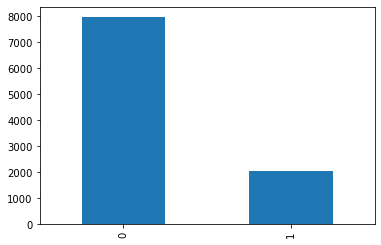

In [151]:
y.value_counts().plot(kind="bar")

<AxesSubplot:>

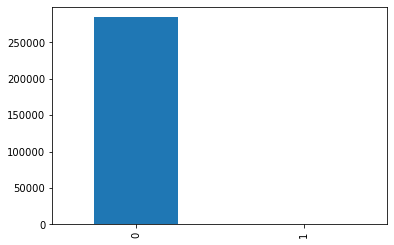

In [152]:
y1.value_counts().plot(kind="bar")